In [1]:
from numpy import *
import pyfftw
from IPython.display import display, Markdown, Math
from matplotlib.pyplot import *

__FFT à 1 dimension__

In [2]:
TYPE = "complex128"
N = 100
a = pyfftw.empty_aligned(N, dtype=TYPE) 
b = pyfftw.empty_aligned(N, dtype=TYPE)

$pyfftw.empty\_aligned(N, dtype=TYPE)$ renvoie un tableau de taille $N$ de nombres aléatoires. Ces nombres sont aléatoires et devront donc être précisés plus tard.

On dit maintenant au programme que la bonne transformée de Fourier sera stockée dans $b$ et cette transformation sera appellée $fft\_object$. 

In [3]:
fft_object = pyfftw.FFTW(a, b)

On crée à présent la transformée de Fourier inverse qui prendra les données de $b$, 
fera la transformée inverse et stockera les nouvelles données dans $c$.

In [4]:
c = pyfftw.empty_aligned(N, dtype=TYPE)

ifft_object = pyfftw.FFTW(b, c, direction='FFTW_BACKWARD')

On rempli maintenant la liste $a$ avec les données qui nous interesse. 
Pour tester le programme, nous prendrons dans un premier temps des valeurs aléatoires.

In [5]:
ar, ai = random.randn(2, N)
a[:] = ar + 1j*ai*0  #partie imaginaire à 0

On appelle à présent les transformations générales définies plus haut pour les 
appliquer dans le cas particulier des données aléatoires de $a$ qui 
viennent d\'être implémentées.

In [6]:
ffta=fft_object()
ifft_ = ifft_object() 

Vérifions à présent que les transformées inverses correspondent bien 
aux données de bases dans la limite de l'erreur $rtol$.

In [7]:
print( np.allclose(ifft_,c, rtol=1.e-15) )
print( np.allclose(a,c, rtol=1.e-13) )

True
True


La première commande est en réalité triviale en sachant que $ifft\_$ et $c$ sont le même objet. On peut le prouver grace à la commande suivante :

In [8]:
ifft_ is c

True

Pour que cela soit plus visuel, traçons les données de $a$ à coté de celles de $c$ puis celles de $b$ à coté de celles de $ffta$ :

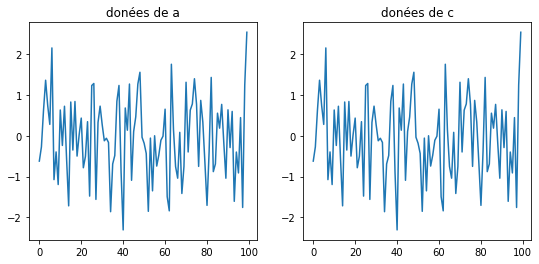

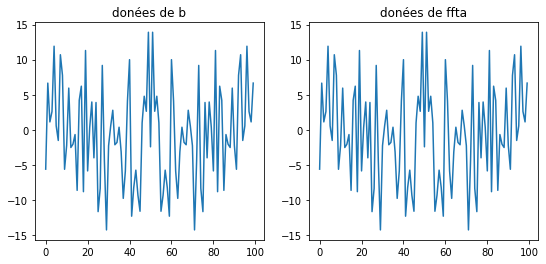

In [9]:
T=[i for i in range(len(a))]

fig = figure(1, figsize=(9, 4))

subplot(121)

plot(T,a.real)
title('donées de a')


subplot(122)

plot(T,c.real)
title('donées de c')
show()


fig = figure(1, figsize=(9, 4))
subplot(121)

plot(T,b.real)

title('donées de b')
subplot(122)

plot(T,ffta.real)
title('donées de ffta')
show()


In [10]:
x=linspace(0,6*pi,N)

In [11]:
for k in range(len(a)) :
    a[k]=sin(x[k])+0.15*ar[k] +1j*0

In [12]:
b=fft_object()
ifft_ = ifft_object() 

In [13]:
print( np.allclose(ifft_,c, rtol=1.e-15) )
print( np.allclose(a,c, rtol=1.e-13) )

True
True


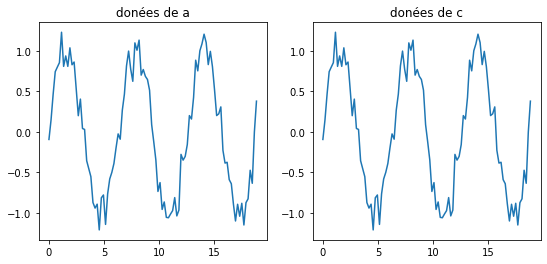

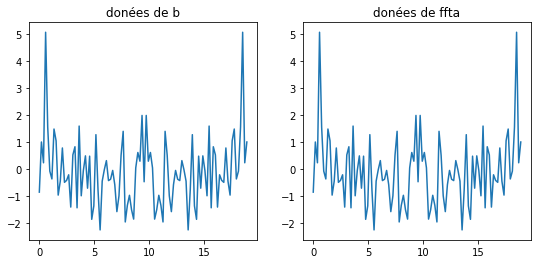

In [14]:
fig = figure(1, figsize=(9, 4))

subplot(121)

plot(x,a.real)
title('donées de a')


subplot(122)

plot(x,c.real)
title('donées de c')
show()


fig = figure(1, figsize=(9, 4))
subplot(121)

plot(x,b.real)

title('donées de b')
subplot(122)

plot(x,ffta.real)
title('donées de ffta')
show()

In [15]:
moyb=0
ini=0
for k in range(len(b)):
    ini+=b[k].real
moyb=ini/len(b)
ecty=std(b.real)


In [16]:
moyb

-0.0931677247713089

In [17]:
ecty

1.2638376948322942

In [18]:
pic=[]
for k in range(len(b)):
    if abs(b[k].real)>(moyb+2*ecty):
        pic.append(b[k])
    else :
        pic.append(0+1j*0)

In [19]:
b=pic

In [20]:
c= ifft_object(b) 

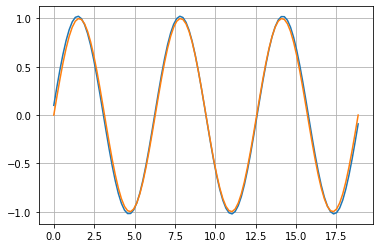

In [21]:
plot(x,c.real)
plot(x,sin(x))
grid(True)
show()

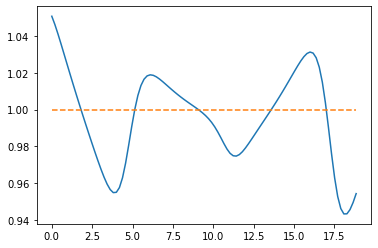

In [22]:
ratio=[]
un=[1 for i in range(len(x))]
for k in range(len(c)):
    ratio.append((c[k].real+2)/(sin(x[k])+2))

plot(x,ratio)
plot(x,un,linestyle='--')
show()

In [ ]:
https://hmf.enseeiht.fr/travaux/projnum/book/export/html/2329